## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_df = pd.merge(study_results_df, mouse_metadata_df, 
                      how='outer', on="Mouse ID")
# Display the data table for preview
combined_df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.

number_of_mice = combined_df["Mouse ID"].value_counts()
number_of_mice

g989    13
a401    10
i738    10
u364    10
y478    10
        ..
v199     1
l872     1
h428     1
n482     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
?duplicated


Object `duplicated` not found.


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"])]
                             
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicates = combined_df.loc[combined_df["Mouse ID"] == "g989",:]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_df[combined_df['Mouse ID'] != 'g989']
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Checking the number of mice in the clean DataFrame.

clean_mice = clean_df["Mouse ID"].value_counts()
clean_mice

x402    10
c832    10
c139    10
k210    10
p189    10
        ..
f932     1
l872     1
v199     1
h428     1
n482     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the 
# tumor volume for each regimen

mean_tumor_volume = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]

median_tumor_volume = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]

variance_tumor = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]

standard_var_tumor = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]

sem_tutor_volume = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_stat_df = pd.DataFrame({"Mean": mean_tumor_volume,
                               "Median": median_tumor_volume,
                               "Variance": variance_tumor,
                               "Standard Deviation": standard_var_tumor,
                               "SEM": sem_tutor_volume})
summary_stat_df 

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM
# of the tumor volume for each regimen

# This method produces everything in a single groupby function

# summary_stat_2_df = clean_df.groupby("Drug Regimen")
# summary_stat_2_df = summary_stat_2_df["Tumor Volume (mm3)"]
# summary_stat_2_df.describe()

summary_stat_2_df = clean_df.groupby("Drug Regimen")
summary_stat_2_df["Tumor Volume (mm3)"].agg([np.mean, np.median, np.var, np.std, stats.sem])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

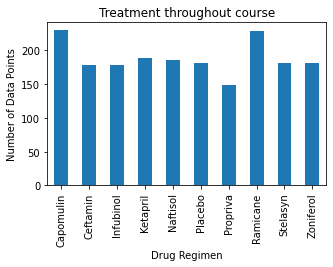

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course 
# of the study using pandas. 

#set the dataframe to what we want to show
pandas_bar_chart = clean_df.groupby("Drug Regimen").count()
pandas_bar_chart = pandas_bar_chart["Timepoint"]
# pandas_bar_chart

# # Plot chart using pandas 
pandas_bar_chart.plot(kind="bar", figsize=(5,3))

# # Add axis and title  
plt.title("Treatment throughout course")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")


In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course 
# of the study using pyplot.

pyplot_bar_chart_df = clean_df.groupby("Drug Regimen").count()

pyplot_bar_chart_timepoint_df = pyplot_bar_chart_df["Timepoint"]

# pyplot_bar_chart_df_timepoint

In [12]:
# Reset index for x values 

pyplot_bar_chart_df = pyplot_bar_chart_df.reset_index()

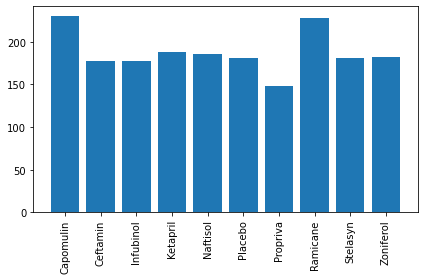

In [13]:
# Pyplot the chart 

x_axis = np.arange(len(pyplot_bar_chart_timepoint_df))

plt.bar(x_axis, pyplot_bar_chart_timepoint_df, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, pyplot_bar_chart_df["Drug Regimen"], rotation="vertical")

# add y axis 

plt.tight_layout()

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

male_vs_female_df = clean_df["Sex"].value_counts()


male_vs_female_df = male_vs_female_df.plot(kind="pie", autopct="%1.1f%%" figsize=(5,5))


SyntaxError: invalid syntax (<ipython-input-40-3d2cc9afc1f0>, line 6)

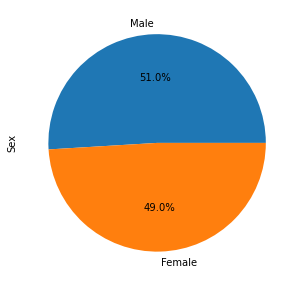

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create series for the mice by sex 

male_vs_female_df = clean_df["Sex"].value_counts()


# Plot the chart 

pyplot_pie = male_vs_female_df.plot.pie(y='Sex', autopct="%1.1f%%", 
                                        figsize=(5, 5))



## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [17]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
